<a href="https://colab.research.google.com/github/null-minds/APR_assignment_1_Logistic_regression/blob/main/logistic_regression_social_network_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Model for Social Network Ads

This project builds a complete logistic regression model to predict whether a user will purchase a product based on their age, estimated salary, and gender, using the "Social_Network_Ads.csv" dataset.

## Project Steps

The following steps were performed:

1.  **Load the data**: The "Social_Network_Ads.csv" file was loaded into a pandas DataFrame.
2.  **Preprocess the data**:
    *   Missing values were checked (none found in this dataset).
    *   The 'Gender' column was one-hot encoded.
    *   'Age' and 'EstimatedSalary' features were scaled using StandardScaler.
3.  **Split the data**: The preprocessed data was split into training (75%) and testing (25%) sets.
4.  **Build the logistic regression model**: A Logistic Regression model was trained on the training data.
5.  **Evaluate the model**: The model's performance was evaluated on the test set using:
    *   Accuracy: 0.8800
    *   Precision: 0.9310
    *   Recall: 0.7297
    *   F1-score: 0.8182
6.  **Visualize the results**: The decision boundary of the model was visualized for both the training and test sets, showing how the model classifies users based on Age and EstimatedSalary.

## Key Findings

*   The model achieved good accuracy and precision in predicting purchases.
*   The recall indicates that the model identified a significant portion of actual purchases, but there is room for improvement.

## Next Steps

*   Explore other classification models to compare performance.
*   Tune hyperparameters of the Logistic Regression model to potentially improve recall.
*   Investigate misclassified instances to understand model limitations.

# Task
Build a complete logistic regression model using the "Social_Network_Ads.csv" dataset, including data preprocessing, model building, model evaluation, and visualization.

## Load the data

### Subtask:
Load the "Social_Network_Ads.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display its head and shape.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Social_Network_Ads.csv')
display(df.head())
print(df.shape)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


(400, 5)


## Preprocess the data

### Subtask:
Handle any missing values, encode categorical features, and scale the features.


**Reasoning**:
Handle missing values, encode categorical features, and scale numerical features as per the instructions.



In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Check for and handle any missing values
print("Missing values before handling:")
print(df.isnull().sum())
# No missing values found in this dataset based on previous exploration.
# If there were missing values, strategies like imputation (e.g., using SimpleImputer) would be applied here.

# 2. Encode the 'Gender' column and 3. Select features for scaling, 4. Scale the selected features
# Create a column transformer to apply different transformations to different columns
# 'passthrough' keeps other columns ('User ID', 'Purchased')
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Gender']),
        ('scaler', StandardScaler(), ['Age', 'EstimatedSalary'])
    ],
    remainder='passthrough'
)

# 5. Create a new DataFrame containing the transformed features
# Apply the preprocessing steps to the dataframe
X_processed = preprocessor.fit_transform(df)

# Get feature names after transformation
gender_features = preprocessor.transformers_[0][1].get_feature_names_out(['Gender'])
scaled_features = ['Age', 'EstimatedSalary']
remainder_features = ['User ID', 'Purchased'] # These columns were not transformed

# Combine the feature names
all_features = np.concatenate([gender_features, scaled_features, remainder_features])

# Create a new DataFrame
df_processed = pd.DataFrame(X_processed, columns=all_features)

display(df_processed.head())
print(df_processed.shape)

Missing values before handling:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


,Gender_Female,Gender_Male,Age,EstimatedSalary,User ID,Purchased
0,0.0,1.0,-1.781797,-1.490046,15624510.0,0.0
1,0.0,1.0,-0.253587,-1.460681,15810944.0,0.0
2,1.0,0.0,-1.113206,-0.785290,15668575.0,0.0
3,1.0,0.0,-1.017692,-0.374182,15603246.0,0.0
4,0.0,1.0,-1.781797,0.183751,15804002.0,0.0


(400, 6)


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the preprocessed data into training and testing sets using the specified features and target variable.



In [3]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_processed[['Gender_Female', 'Gender_Male', 'Age', 'EstimatedSalary']]
y = df_processed['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (300, 4)
Shape of X_test: (100, 4)
Shape of y_train: (300,)
Shape of y_test: (100,)


## Build the logistic regression model

### Subtask:
Train a logistic regression model on the training data.


**Reasoning**:
Train a logistic regression model on the training data.



In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

## Evaluate the model

### Subtask:
Evaluate the model's performance using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Evaluate the trained logistic regression model by making predictions on the test set and calculating evaluation metrics.



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the calculated metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8800
Precision: 0.9310
Recall: 0.7297
F1-score: 0.8182


## Visualize the results

### Subtask:
Visualize the decision boundary of the model and the classification results.


**Reasoning**:
Import the necessary libraries for visualization and create the meshgrid for the training set.



In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Create meshgrid for the training set
# Define the range for Age and EstimatedSalary based on the training data
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set['Age'].min() - 1, stop = X_set['Age'].max() + 1, step = 0.01),
                     np.arange(start = X_set['EstimatedSalary'].min() - 1, stop = X_set['EstimatedSalary'].max() + 1, step = 0.01))

**Reasoning**:
Predict the classes for the meshgrid points, create a contour plot for the decision boundary, and plot the training data points.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1009506416.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j]['Age'], X_set[y_set == j]['EstimatedSalary'],


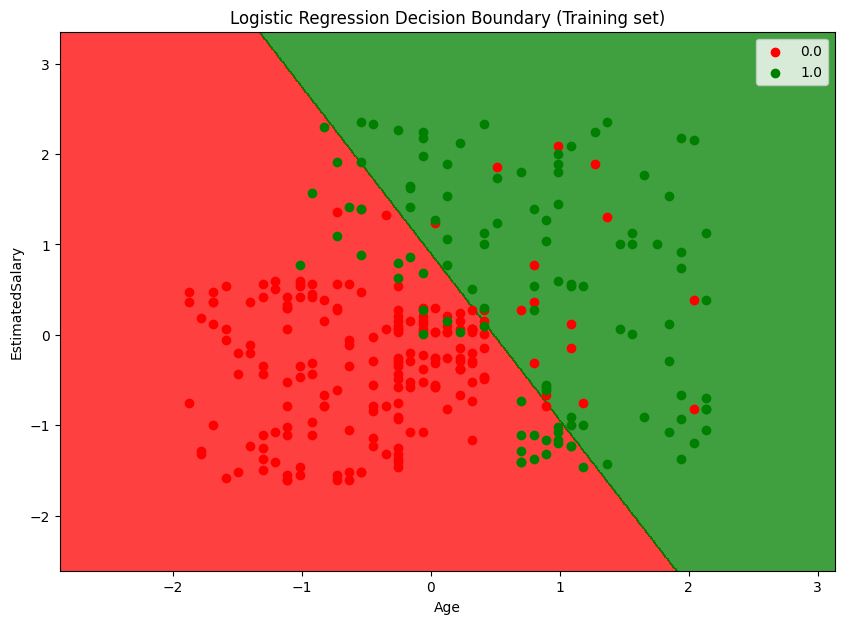

In [7]:
# Predict the class for each point in the meshgrid
# We need to combine the meshgrid points with the gender columns for prediction
# Since we are visualizing based on Age and EstimatedSalary, and Gender is one-hot encoded,
# we'll assume a representative gender (e.g., Male=1, Female=0) for the meshgrid prediction.
# A more robust approach would involve plotting separate decision boundaries for each gender.
# For simplicity, we'll use the average gender distribution in the training set, though
# for a clear boundary visualization, setting one gender to 1 and the other to 0 is common practice.
# Let's use Female=0, Male=1 for the meshgrid for a single boundary visualization.
meshgrid_points = np.array([X1.ravel(), X2.ravel()]).T
# Add dummy gender columns assuming male=1, female=0 for all points
# The order of columns should match the training data: Gender_Female, Gender_Male, Age, EstimatedSalary
meshgrid_with_gender = np.insert(meshgrid_points, 0, values=1, axis=1) # Insert 1 for Gender_Male
meshgrid_with_gender = np.insert(meshgrid_with_gender, 0, values=0, axis=1) # Insert 0 for Gender_Female

Z = model.predict(meshgrid_with_gender).reshape(X1.shape)

# Create a contour plot to visualize the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Plot the training data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j]['Age'], X_set[y_set == j]['EstimatedSalary'],
                c = ListedColormap(('red', 'green'))(i), label = j)

# Add labels and title
plt.title('Logistic Regression Decision Boundary (Training set)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()

**Reasoning**:
Repeat the process of creating a meshgrid, predicting classes, creating a contour plot, and plotting data points, but this time for the test set.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-4003113703.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j]['Age'], X_set[y_set == j]['EstimatedSalary'],


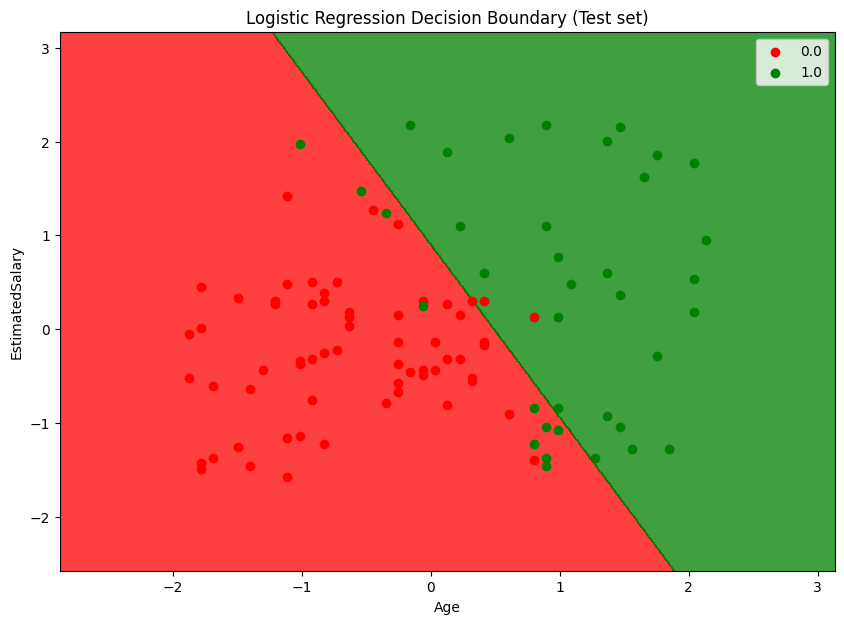

In [8]:
# Create meshgrid for the test set
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Age'].min() - 1, stop = X_set['Age'].max() + 1, step = 0.01),
                     np.arange(start = X_set['EstimatedSalary'].min() - 1, stop = X_set['EstimatedSalary'].max() + 1, step = 0.01))

# Predict the class for each point in the meshgrid (using the same gender assumption as before)
meshgrid_points = np.array([X1.ravel(), X2.ravel()]).T
meshgrid_with_gender = np.insert(meshgrid_points, 0, values=1, axis=1) # Insert 1 for Gender_Male
meshgrid_with_gender = np.insert(meshgrid_with_gender, 0, values=0, axis=1) # Insert 0 for Gender_Female

Z = model.predict(meshgrid_with_gender).reshape(X1.shape)

# Create a contour plot to visualize the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Plot the test data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j]['Age'], X_set[y_set == j]['EstimatedSalary'],
                c = ListedColormap(('red', 'green'))(i), label = j)

# Add labels and title
plt.title('Logistic Regression Decision Boundary (Test set)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 400 rows and 5 columns, with no missing values found.
*   The 'Gender' column was successfully one-hot encoded into 'Gender\_Female' and 'Gender\_Male' columns.
*   The 'Age' and 'EstimatedSalary' features were successfully scaled using StandardScaler.
*   The dataset was split into training (300 samples) and testing (100 samples) sets, with 75% of the data used for training and 25% for testing.
*   A Logistic Regression model was successfully trained on the scaled and encoded training data.
*   The model achieved an accuracy of 0.8800 on the test set.
*   The model showed a precision of 0.9310, indicating a high rate of correctly predicted positive cases among all positive predictions.
*   The recall of 0.7297 suggests that the model identified about 73% of the actual positive cases.
*   The F1-score of 0.8182 represents a balance between precision and recall.
*   Visualizations of the decision boundary clearly show how the model separates the classes based on 'Age' and 'EstimatedSalary' in both the training and test sets.

### Insights or Next Steps

*   While the accuracy is decent, exploring other models or tuning hyperparameters of the logistic regression model could potentially improve recall without significantly sacrificing precision, which might be important depending on the cost of false negatives.
*   Investigating the cases where the model made incorrect predictions in the test set could provide insights into potential limitations or areas for further feature engineering.
